# FDA Homework 3
---

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Load Data
* Dataset: https://www.sharecast.com/index/SP_500/prices/download
* Training set
    * 02-Jan-2009 to 29-Dec-2017
* Test set
    * 02-Jan-2018 to 31-Dec-2018

In [2]:
pd_train=pd.read_csv(u'./train.csv')
pd_train.head(3)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032


In [3]:
pd_test=pd.read_csv(u'./test.csv')
pd_test.head(3)

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744


### draw the Close Price Movement

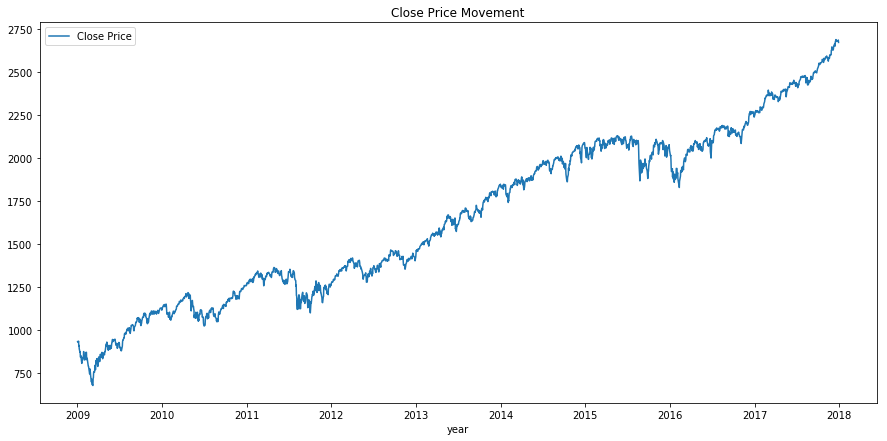

In [4]:
plt.figure(figsize=(15,7))
plt.plot_date(pd.to_datetime(pd_train['Date']), pd_train['Close Price'], '-')
plt.title('Close Price Movement')
plt.legend(['Close Price'])
plt.xlabel('year')
plt.show()

## Peprocess Dataset
### caculate Close Price grow 
To predict the next day's Close Price is grow or not, I set an attribute 'grow' to record the next day's stock movement.
* 0: Close Price doesn't grow
* 1: Close Price grow

In [5]:
pd_train['grow']=0
for x in range(0, 2263):
    if pd_train.iloc[x][2]<pd_train.iloc[x+1][2]:
        pd_train.at[x, 'grow']=1

pd_train.head(5)

,Date,Open Price,Close Price,High Price,Low Price,Volume,grow
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,0


In [6]:
pd_test['grow']=0
for x in range(0, 250):
    if pd_test.iloc[x][2]<pd_test.iloc[x+1][2]:
        pd_test.at[x, 'grow']=1

pd_test.head(5)

,Date,Open Price,Close Price,High Price,Low Price,Volume,grow
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,1


### split x_train, y_train and drop some attributes

In [7]:
x_train = pd_train.drop(['Date'], axis=1)
x_train = x_train.drop(['Close Price'], axis=1)
x_train = x_train.drop(['Volume'], axis=1)
x_train = x_train.drop(['grow'], axis=1)
x_train.head(3)

,Open Price,High Price,Low Price
0,902.99,934.73,899.35
1,929.17,936.63,919.53
2,931.17,943.85,927.28


In [8]:
y_train = pd_train['grow']
y_train.head(3)

0    0
1    1
2    0
Name: grow, dtype: int64

### split x_test, y_test and drop some attributes

In [9]:
x_test = pd_test.drop(['Date'], axis=1)
x_test = x_test.drop(['Close Price'], axis=1)
x_test = x_test.drop(['Volume'], axis=1)
x_test = x_test.drop(['grow'], axis=1)
x_test.head(3)

,Open Price,High Price,Low Price
0,2683.73,2695.89,2682.36
1,2697.85,2714.37,2697.77
2,2719.31,2729.29,2719.07


In [10]:
y_test = pd_test['grow']
y_test.head(3)

0    1
1    1
2    1
Name: grow, dtype: int64

### standarize the data

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

## 1. use Logistic Regression to predict

In [12]:
from sklearn.linear_model import LogisticRegression

### accuracy

In [13]:
clf = LogisticRegression(random_state=0, solver='liblinear').fit(x_train_std, y_train)

test_std_preds = clf.predict(x_test_std)
test_acc = accuracy_score(y_test, test_std_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 51.59 %


### try to modify the class weight and predict
dataset is not balanced, so I try to modify the class weight to 'balanced' to solve the problem

But, it doesn't work...

In [14]:
clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(x_train_std, y_train)

test_std_preds = clf.predict(x_test_std)
test_acc = accuracy_score(y_test, test_std_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 48.41 %


### try to use more attributes to predict
Maybe I have dropped some important attributes above, so the accuracy is low.

So, I decide to ues all the atttribues except 'Date'.

It doesn't works...

In [15]:
X_train = pd_train.drop(['Date'], axis=1)
X_train = X_train.drop(['grow'], axis=1)

X_test = pd_test.drop(['Date'], axis=1)
X_test = X_test.drop(['grow'], axis=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train_std, y_train)
test_std_preds = clf.predict(X_test_std)
test_acc = accuracy_score(y_test, test_std_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 51.59 %


/home/chienchia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chienchia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/home/chienchia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


### try to use Gradient Descent Model to improve accuracy
passing log to argument loss to get a logistic regressin model

In [16]:
model_SGD = linear_model.SGDClassifier(loss='log', max_iter=10000, tol=-np.infty)
model_SGD.fit(x_train_std, y_train)

test_preds = model_SGD.predict(x_test_std)
test_acc = accuracy_score(y_test, test_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 51.59 %


## 2. use SVM to predict

In [17]:
from sklearn.svm import SVC

In [18]:
penalty = 0.01

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 0.01, Test accuracy = 51.59 %


### try to modify kernel to poly, rbf, sigmoid and predict
They are all the same.

It doesn't work...

In [19]:
penalty = 0.01

svm = SVC(C=penalty, kernel="poly", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Kernel = poly, Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Kernel = poly, Penalty = 0.01, Test accuracy = 51.59 %


In [20]:
penalty = 0.01

svm = SVC(C=penalty, kernel="rbf", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Kernel = rbf, Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Kernel = rbf, Penalty = 0.01, Test accuracy = 51.59 %


In [21]:
penalty = 0.01

svm = SVC(C=penalty, kernel="sigmoid", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Kernel = sigmoid, Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Kernel = sigmoid, Penalty = 0.01, Test accuracy = 51.59 %


### try to improve accuracy by penalty
* penalty越大，容錯率越低
* penalty越小，容錯率越高

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for x in range(1, 11):
    penalty = x

    svm = SVC(C=penalty, kernel="rbf", probability=True)
    svm.fit(x_train_std, y_train)
  
    acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
    print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 1.00, Test accuracy = 51.59 %
Penalty = 2.00, Test accuracy = 51.59 %
Penalty = 3.00, Test accuracy = 51.59 %
Penalty = 4.00, Test accuracy = 52.38 %
Penalty = 5.00, Test accuracy = 54.37 %
Penalty = 6.00, Test accuracy = 53.17 %
Penalty = 7.00, Test accuracy = 55.56 %
Penalty = 8.00, Test accuracy = 57.54 %
Penalty = 9.00, Test accuracy = 57.14 %
Penalty = 10.00, Test accuracy = 55.56 %


發現當 Penalty=8 時，accuracy達到最高，縮小範圍至8.1~9.0

In [23]:
for x in range(1, 11):
    penalty = 8+x*0.1
    
    svm = SVC(C=penalty, kernel="rbf", probability=True)
    svm.fit(x_train_std, y_train)
  
    acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
    print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 8.10, Test accuracy = 57.14 %
Penalty = 8.20, Test accuracy = 57.54 %
Penalty = 8.30, Test accuracy = 57.54 %
Penalty = 8.40, Test accuracy = 57.94 %
Penalty = 8.50, Test accuracy = 57.94 %
Penalty = 8.60, Test accuracy = 58.73 %
Penalty = 8.70, Test accuracy = 58.73 %
Penalty = 8.80, Test accuracy = 58.33 %
Penalty = 8.90, Test accuracy = 57.14 %
Penalty = 9.00, Test accuracy = 57.14 %


發現當 penalty=8.4~8.5 時，accuracy達到最高，縮小範圍至8.41~8.50

In [24]:
for x in range(1, 11):
    penalty = 8.4+x*0.01
    
    svm = SVC(C=penalty, kernel="rbf", probability=True)
    svm.fit(x_train_std, y_train)
  
    acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
    print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 8.41, Test accuracy = 57.94 %
Penalty = 8.42, Test accuracy = 57.94 %
Penalty = 8.43, Test accuracy = 57.94 %
Penalty = 8.44, Test accuracy = 57.94 %
Penalty = 8.45, Test accuracy = 57.94 %
Penalty = 8.46, Test accuracy = 57.94 %
Penalty = 8.47, Test accuracy = 57.94 %
Penalty = 8.48, Test accuracy = 57.94 %
Penalty = 8.49, Test accuracy = 57.94 %
Penalty = 8.50, Test accuracy = 57.94 %


發現當Penalty在8.41~8.5之間accuracy最大，所以set penalty=8.5

In [25]:
penalty = 8.5

svm = SVC(C=penalty, kernel="rbf", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 8.50, Test accuracy = 57.94 %


## 3. use Neural Network to predict

In [26]:
import tensorflow
from keras import models, layers, optimizers, regularizers
from sklearn import preprocessing

Using TensorFlow backend.


### try to use one hidden layer(20 units) and Adam optimizer
The loss history looks weird...

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2264/2264 [==============================] - 1s 280us/step - loss: 0.7604 - acc: 0.5437
Epoch 2/10
2264/2264 [==============================] - 0s 82us/step - loss: 0.7528 - acc: 0.5455
Epoch 3/10
2264/2264 [==============================] - 0s 74us/step - loss: 0.7552 - acc: 0.5424
Epoch 4/10
2264/2264 [==============================] - 0s 76us/step - loss: 0.7603 - acc: 0.5433
Epoch 5/10
2264/2264 [==============================] - 0s 71us/step - loss: 0.7549 - acc: 0.5393
Epoch 6/10
2264/2264 [==============================] - 0s 72us/step - loss: 0.7551 - acc: 0.5437
Epoch 7/10
2264/2264 [==============================] - 0s 78us/step - loss: 0.7526 - acc: 0.5455
Epoch 8/10
2264/2264 [==============================] - 0s 62us/step - loss: 0.7549 - acc: 0.5428
Epoch 9/10
2264/2264 [==============================] - 0s 67us/step - loss: 0.7530 - acc: 0.54

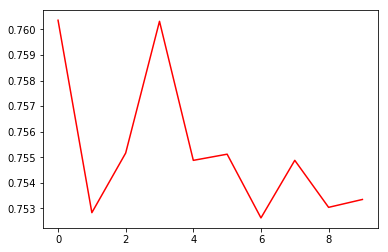

In [27]:
hidden_units = 20
activation = 'relu'
learning_rate = 0.01
batch_size = 32
class_weight = {
    0: 1,
    1: 1236 / 1028
}

model = models.Sequential()

model.add(layers.Dense(input_dim=3,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_std,
                    y_train,
                    epochs=10,
                    batch_size=batch_size,
                    class_weight=class_weight)

test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]*100
print("Test accuracy = %.2f %%" % (test_acc))

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### with same layers, but using SGD optimizer
The loss history looks better, but the accuracy doesn't improve.

Epoch 1/10
2264/2264 [==============================] - 1s 230us/step - loss: 0.8055 - acc: 0.5186
Epoch 2/10
2264/2264 [==============================] - 0s 56us/step - loss: 0.7660 - acc: 0.5375
Epoch 3/10
2264/2264 [==============================] - 0s 59us/step - loss: 0.7561 - acc: 0.5437
Epoch 4/10
2264/2264 [==============================] - 0s 61us/step - loss: 0.7536 - acc: 0.5459
Epoch 5/10
2264/2264 [==============================] - 0s 152us/step - loss: 0.7530 - acc: 0.5459
Epoch 6/10
2264/2264 [==============================] - 0s 110us/step - loss: 0.7526 - acc: 0.5459
Epoch 7/10
2264/2264 [==============================] - 0s 114us/step - loss: 0.7524 - acc: 0.5459
Epoch 8/10
2264/2264 [==============================] - 0s 66us/step - loss: 0.7523 - acc: 0.5459
Epoch 9/10
2264/2264 [==============================] - 0s 65us/step - loss: 0.7522 - acc: 0.5459
Epoch 10/10
252/252 [==============================] - 0s 793us/step
Test accuracy = 51.59 %


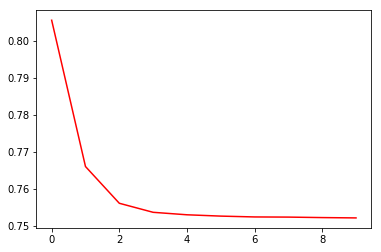

In [28]:
hidden_units = 20
activation = 'relu'
learning_rate = 0.01
batch_size = 32
class_weight = {
    0: 1,
    1: 1236 / 1028
}

model = models.Sequential()

model.add(layers.Dense(input_dim=3,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_std,
                    y_train,
                    epochs=10,
                    batch_size=batch_size,
                    class_weight=class_weight)

test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]*100
print("Test accuracy = %.2f %%" % (test_acc))

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### try to use two hidden layer(20 units) and SGD optimizer
It doesn't work, the accuracy remains.

Epoch 1/10
2264/2264 [==============================] - 1s 239us/step - loss: 0.7777 - acc: 0.4837
Epoch 2/10
2264/2264 [==============================] - 0s 121us/step - loss: 0.7573 - acc: 0.5464
Epoch 3/10
2264/2264 [==============================] - 0s 166us/step - loss: 0.7529 - acc: 0.5459
Epoch 4/10
2264/2264 [==============================] - 0s 108us/step - loss: 0.7517 - acc: 0.5459
Epoch 5/10
2264/2264 [==============================] - 0s 89us/step - loss: 0.7515 - acc: 0.5459
Epoch 6/10
2264/2264 [==============================] - 0s 148us/step - loss: 0.7514 - acc: 0.5459
Epoch 7/10
2264/2264 [==============================] - 0s 91us/step - loss: 0.7515 - acc: 0.5459
Epoch 8/10
2264/2264 [==============================] - 0s 79us/step - loss: 0.7513 - acc: 0.5459
Epoch 9/10
2264/2264 [==============================] - 0s 92us/step - loss: 0.7513 - acc: 0.5459
Epoch 10/10
252/252 [==============================] - 0s 874us/step
Test accuracy = 51.59 %


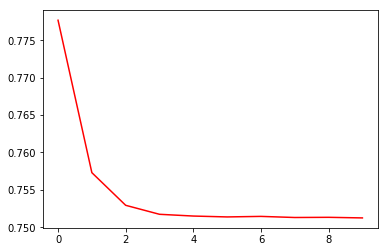

In [29]:
hidden_units = 20
activation = 'relu'
learning_rate = 0.01
batch_size = 32
class_weight = {
    0: 1,
    1: 1236 / 1028
}

model = models.Sequential()

model.add(layers.Dense(input_dim=3,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_std,
                    y_train,
                    epochs=10,
                    batch_size=batch_size,
                    class_weight=class_weight)

test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]*100
print("Test accuracy = %.2f %%" % (test_acc))

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Discussion

### Logistic Regression, SVM, NN預測出來的結果準確率幾乎都差不多
* 推測可能原因為股票漲跌可能會受到很多因素影響，如：公司盈虧、公司財報、公司營運...等
* 現在也還沒有人可以準確預測股票漲跌，而這次作業的dataset attributes過少更難去預測股票的漲跌

## Another Dataset
use Titanic Dataset: https://www.kaggle.com/c/titanic/data

use the dataset to implment Logistic Regression, SVM and NN

### Load Data

In [30]:
df = pd.read_csv(u'./Titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Preprocess training Data

In [31]:
# drop useless attributes
df = df.drop(['PassengerId'], axis = 1)
df = df.drop(['Name'], axis = 1)
df = df.drop(['Ticket'], axis = 1)
df = df.drop(['Fare'], axis = 1)
df = df.drop(['Cabin'], axis = 1)
df = df.drop(['Embarked'], axis = 1)

# fill average age to null
age = df['Age']
average = age.sum(axis = 0, skipna = True) /len(age)
df['Age'].fillna(average, inplace = True)

# convert sex into binary(male:1, femal:0)
sex_map = {'female' : 0, 'male' :1}
df['Sex'] = df['Sex'].map(sex_map)

df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0


### split training data and test data

In [32]:
x_train = df[:700]
x_test = df[700:]

### split x_train, y_train and x_test, y_test 

In [33]:
y_train = x_train['Survived']
x_train = x_train.drop(['Survived'], axis = 1)

y_test = x_test['Survived']
x_test = x_test.drop(['Survived'], axis=1)

### standarize the data

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

/home/chienchia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chienchia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/chienchia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## 1. Logistic Regression

In [35]:
clf = LogisticRegression(random_state=0, solver='liblinear').fit(x_train_std, y_train)

test_std_preds = clf.predict(x_test_std)
test_acc = accuracy_score(y_test, test_std_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 80.63 %


## 2. SVM

In [36]:
penalty = 0.01

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 0.01, Test accuracy = 79.06 %


## 3. Neural Network(2 hidden layers)

Epoch 1/10
700/700 [==============================] - 0s 689us/step - loss: 0.7921 - acc: 0.4129
Epoch 2/10
700/700 [==============================] - 0s 108us/step - loss: 0.7609 - acc: 0.4657
Epoch 3/10
700/700 [==============================] - 0s 131us/step - loss: 0.7399 - acc: 0.5871
Epoch 4/10
700/700 [==============================] - 0s 277us/step - loss: 0.7231 - acc: 0.7157
Epoch 5/10
700/700 [==============================] - 0s 125us/step - loss: 0.7092 - acc: 0.7671
Epoch 6/10
700/700 [==============================] - 0s 63us/step - loss: 0.6970 - acc: 0.7771
Epoch 7/10
700/700 [==============================] - 0s 72us/step - loss: 0.6853 - acc: 0.7900
Epoch 8/10
700/700 [==============================] - 0s 84us/step - loss: 0.6743 - acc: 0.7943
Epoch 9/10
700/700 [==============================] - 0s 88us/step - loss: 0.6637 - acc: 0.7929
Epoch 10/10
191/191 [==============================] - 0s 727us/step
Test accuracy = 82.72 %


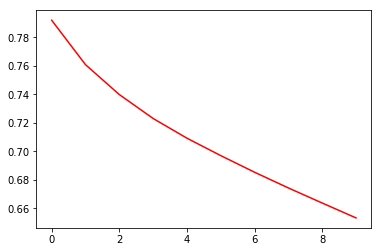

In [38]:
hidden_units = 20
activation = 'relu'
learning_rate = 0.01
batch_size = 32
class_weight = {
    0: 1,
    1: 1236 / 1028
}

model = models.Sequential()

model.add(layers.Dense(input_dim=5,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_std,
                    y_train,
                    epochs=10,
                    batch_size=batch_size,
                    class_weight=class_weight)

test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]*100
print("Test accuracy = %.2f %%" % (test_acc))

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Discussion

### 使用Titanic dataset得出來的accuracy比較高
* 因為Titanic的attributes比股票的attributes更能有效的做預測
* Titanic的Attributes跟Survived的關聯性較高，而預測股票漲跌的attributes關聯性較低，還有許多外在因素會影響股票的漲跌，所以股票的accuracy會比較低

### 2個dataset預測出的準確度皆為Neural Network最高
* 因為Neural Network可以設很多layer，每個layer的unit又可以設很多個，所以model學習力最強，預測出來的結果會最高